# <font color='#eb3483'>$K$-Means Clustering</font>

In this notebook, we are going to apply clustering algorithm to identify homogenous groups of customers from the `mall_customer.csv` dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### <font color='#eb3483'>Import and Explore the Data</font>

In [2]:
df = pd.read_csv("data/mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<font color='#eb3483'>Exercise: </font> Explore your data. How large is it? Are there any missing values? What are the data types?

In [3]:
df.shape

(200, 5)

In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<font color='#eb3483'>Exercise: </font> The income and spending score columns have pretty awkward names. Rename them as "AnnualIncome" and "SpendingScore", respectively.

In [6]:
# rename the columns
df.rename(columns={"Annual Income (k$)": "AnnualIncome", "Spending Score (1-100)": "SpendingScore"}, inplace=True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<font color='#eb3483'>Exercise: </font> Visualize the `Age` and `SpendingScore` distinguished by `Gender`.

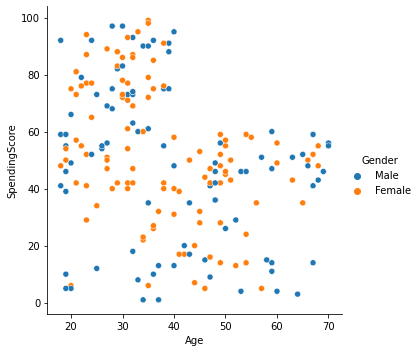

In [7]:
sns.relplot(x="Age", y="SpendingScore", data=df, hue="Gender")

### <font color='#eb3483'> Apply $K$-Means Clustering </font>

Let's attempt to identify clusters based on Age and SpendingScore. Using two variables will allow us to visualize the results, but feel free to re-run this with all the continuous variables. K-means clustering is not suitable for categorical variables.

In [7]:
from sklearn.cluster import KMeans

<font color='#eb3483'>Exercise: </font> Have a look at the help for `KMeans`. What do the "init" and "n_init" arguments do?

In [8]:
?KMeans

Let's perform K-means clustering with K=4 (no particular reason, just as an example!)...

In [9]:
km = KMeans(n_clusters=4) # K = 4 
km.fit(df[['Age','SpendingScore']])

KMeans(n_clusters=4)

<font color='#eb3483'>Exercise: </font> What attributes does the `km` object have?

In [10]:
?km

In [12]:
pd.DataFrame(km.cluster_centers_, columns=['Age','SpendingScore'], index=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'])

,Age,SpendingScore
Cluster1,30.175439,82.350877
Cluster2,27.617021,49.148936
Cluster3,43.291667,15.020833
Cluster4,55.708333,48.229167


In [15]:
km.labels_

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 0,
       2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 3, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [16]:
df['Cluster'] = km.labels_ + 1
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,1


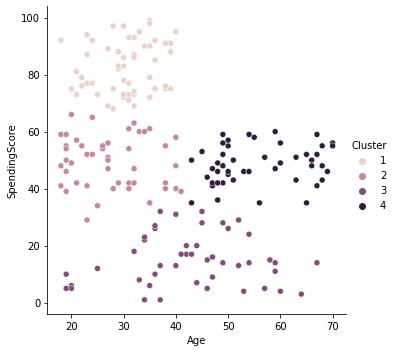

In [14]:
sns.relplot(x="Age", y="SpendingScore", data=df, hue="Cluster")

In [19]:
km.inertia_

28165.583566629342

### <font color='#eb3483'> Finding the Best $K$ </font>

The `sklearn` k-means method calls the total within-cluster variation "inertia". This is stored as the `inertia_` attribute of the fitted object. Next, we will loop over different values of $K$, store the inertia and choose the best value of $K$ using the "elbow" method. 

In [18]:
inertia = []
for k in range(1 , 21):
    estimator = KMeans(n_clusters=k)
    estimator.fit(df[['Age','SpendingScore']])
    inertia.append(estimator.inertia_)

In [16]:
inertia

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23820.554908106657,
 19566.5223413776,
 15639.836861647838,
 13094.352109500813,
 11525.50934029059,
 10175.35016089206,
 9385.274660956375,
 8560.152866798235,
 7919.134844773388,
 7467.583599651981,
 6837.132179173479,
 6346.059607984609,
 5625.327427148017,
 5356.338798198704,
 4891.951014263513,
 4538.67024225774]

<AxesSubplot:>

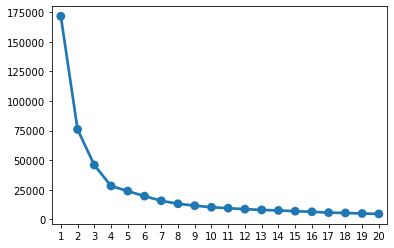

In [17]:
sns.pointplot(x=np.arange(1,21), y=inertia)

<font color='#eb3483'>Exercise: </font> How many clusters would you select? (There is no single "right" answer.)

# <font color='#eb3483'> Hierarchical Clustering </font>

Let's try hierarchical clustering instead...

In [18]:
from sklearn.cluster import AgglomerativeClustering
?AgglomerativeClustering

In [19]:
hier = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='complete')
hier.fit(df[['Age', 'SpendingScore']])

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

To plot the dendrogram, we need to create a function (taken from [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html))...

In [20]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

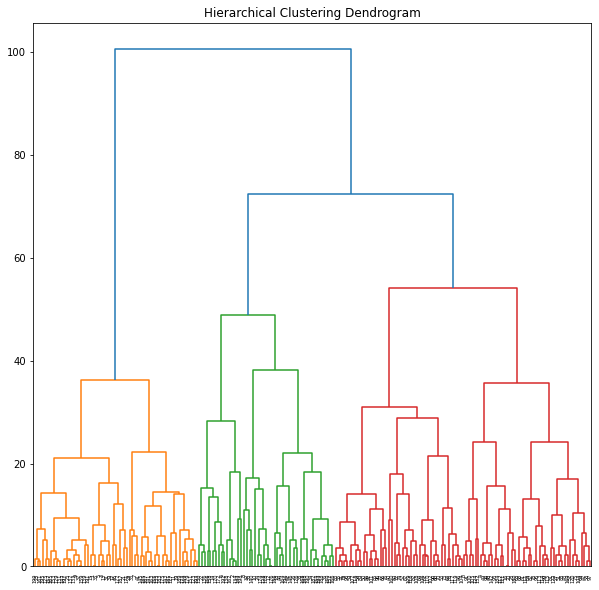

In [21]:
plt.figure(figsize=(10,10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(hier)

Let's apply a threshold of 60...

In [22]:
hier_thresh = AgglomerativeClustering(n_clusters=None, distance_threshold=60, linkage='complete')
hier_thresh.fit(df[['Age', 'SpendingScore']])

AgglomerativeClustering(distance_threshold=60, linkage='complete',
                        n_clusters=None)

In [23]:
df['Cluster'] = hier_thresh.labels_ + 1
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,1


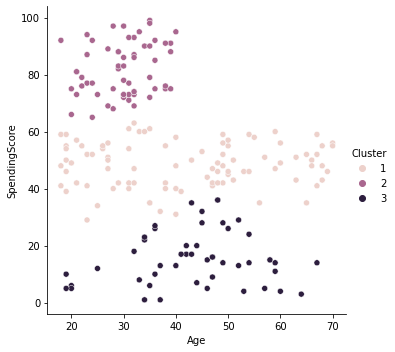

In [24]:
sns.relplot(x="Age", y="SpendingScore", data=df, hue="Cluster")

<font color='#eb3483'>Exercise: </font> How would you describe each cluster? Compute the cluster centroids. 

In [26]:
df.groupby('Cluster')[['Age', 'AnnualIncome', 'SpendingScore']].mean()

,Age,AnnualIncome,SpendingScore
Cluster,,,
1,42.021739,54.478261,48.369565
2,29.898305,64.847458,81.779661
3,43.673469,66.816327,15.612245
